In [38]:
#Test flow cytometry data output counts-poisson model fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson, poisson, chisquare, skew, skewtest
import statsmodels.api as sm

# Specify the path to your CSV file
df = pd.read_csv('844-206v5_081723 CD4+CD127 counts.csv')

df = pd.DataFrame(df)
print(df)

              value  count
0      -1622.426876      0
1      -1619.376166      0
2      -1616.331208      0
3      -1613.291988      0
4      -1610.258489      0
...             ...    ...
4091  260268.646200      0
4092  260913.238400      0
4093  261559.434600      0
4094  262207.238800      0
4095  262856.655000      0

[4096 rows x 2 columns]


In [39]:
# Create a new DataFrame with repeated values based on counts
result_array = np.repeat(df['value'], df['count'])
result_df = pd.DataFrame({'value': np.repeat(df['value'], df['count'])})

# Convert the result to a NumPy array if needed
result_array = result_df['value'].to_numpy()

print(result_array)
# print(result_df['value'])

[-227.3797226   -11.46533868   61.1824532    89.28378744  104.6391157
  109.7627244   117.4534682   120.0185429   152.1534643   153.441897
  166.3406332   189.6303172   198.7149377   198.7149377   200.0140865
  201.3135794   206.5150443   209.117909    209.117909    209.117909
  227.3797226   240.4713902   240.4713902   241.7828587   243.0947565
  247.0330544   253.6057318   254.9216195   262.8266481   264.1457963
  273.3933551   273.3933551   276.0399472   278.6885518   287.9748548
  287.9748548   289.3035642   291.9625838   291.9625838   291.9625838
  293.2929      294.6237576   299.9526637   301.2862742   305.2904755
  310.6373877   324.0457752   324.0457752   324.0457752   326.7346987
  326.7346987   332.1199933   332.1199933   336.1655808   342.921086
  342.921086    344.274145    352.4064775   353.7642266   355.1226589
  375.5833899   375.5833899   378.3237659   382.4399174   386.5628567
  389.3153001   392.0708299   396.2099729   400.3562187   401.7398956
  411.4483296   415.621

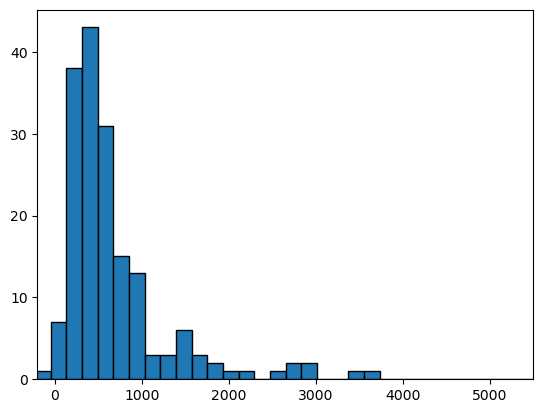

In [48]:
#plot data, exclude x-values >5500
plt.hist(result_array, bins=38, edgecolor='black')
plt.xlim(-200, 5500)
plt.show()

In [35]:
#test the distribution of data
#does it follow a normal distribution?
#Shapiro-Wilk Test

# Assuming 'data' is your DataFrame or array of values
stat, p_value = shapiro(result_array)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")


Statistic: 0.6389063596725464, p-value: 4.553751798232652e-19
Data does not look normally distributed (reject H0)


In [36]:
#Anderson-Darling Test -- another test for normality
# Assuming 'data' is your DataFrame or array of values
result = anderson(result_array)

print(f'Statistic: {result.statistic}, Critical Values: {result.critical_values}')

# Interpret the result
alpha = 0.05
if result.statistic < result.critical_values[2] and p_value < alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")


Statistic: 17.016831635571805, Critical Values: [0.564 0.642 0.77  0.898 1.068]
Data does not look normally distributed (reject H0)


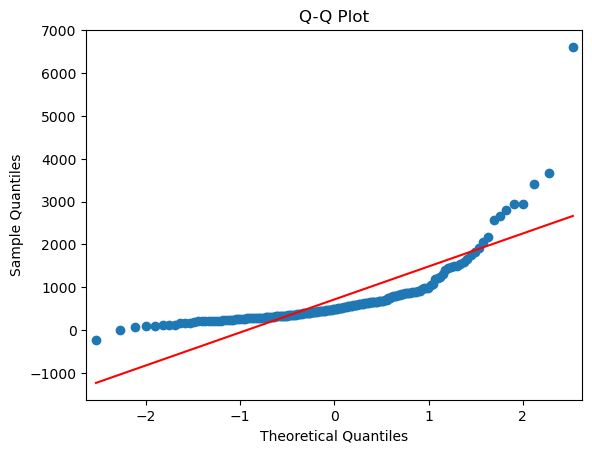

In [45]:
# Q-Q plot
sm.qqplot(result_array, line='s')
plt.title('Q-Q Plot')
plt.show()
#deviations from a straight line suggest non-normality

In [37]:
#Statistical Skewness Test

# Calculate skewness
skewness = skew(result_array)

# Perform skewness test
stat, p_value = skewtest(result_array)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Skewness: 3.7696573870524595, p-value: 3.14506915549132e-26
Data is significantly skewed (reject H0)


In [47]:
#use a few different methods to estimate the best bin sizes
#calculate the SD
std_dev = np.std(result_array)
print(std_dev)

#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )

#using freedman-diaconis rule (Robust (resilient to outliers) estimator that takes into account data variability and data size):
bin_size2 = np.histogram_bin_edges(result_array, bins='fd')
print("\nEstimated Bin Number using Freedman-Diaconis Rule:", len(bin_size2) -1 )

#using doane rule (ideal for non-normal datasets0):
bin_size3 = np.histogram_bin_edges(result_array, bins='doane')
print("\nEstimated Bin Number using improved Sturges' Rule:", len(bin_size3) -1 )

#using Scott's rule (Less robust estimator that takes into account data variability and data size):
bin_size4 = np.histogram_bin_edges(result_array, bins='scott')
print("\nEstimated Bin Number using Scott's Rule:", len(bin_size4) -1 )

#using stone rule (Estimator based on leave-one-out cross-validation estimate of the integrated squared error. Can be regarded as a generalization of Scott’s rule)
bin_size5 = np.histogram_bin_edges(result_array, bins='stone')
print("\nEstimated Bin Number using the Stone Rule:", len(bin_size5) -1 )

#using rice rule (Estimator does not take variability into account, only data size. Commonly overestimates number of bins required.)
bin_size6 = np.histogram_bin_edges(result_array, bins='rice')
print("\nEstimated Bin Number using the Rice Rule:", len(bin_size6) -1 )

#using sturges rule (Estimator does not take variability into account, only data size. Commonly overestimates number of bins required.)
bin_size7 = np.histogram_bin_edges(result_array, bins='sturges')
print("\nEstimated Bin Number using the sturges Rule:", len(bin_size7) -1 )

#using square root rule (Square root (of data size) estimator, used by Excel and other programs for its speed and simplicity.):
bin_size8 = np.histogram_bin_edges(result_array, bins='sqrt')
print("\nEstimated Bin Number using square roots Rule:", len(bin_size8) -1 )

770.6258988839103

Estimated Bin Number using Auto Rule: 38

Estimated Bin Number using Freedman-Diaconis Rule: 38

Estimated Bin Number using improved Sturges' Rule: 13

Estimated Bin Number using Scott's Rule: 15

Estimated Bin Number using the Stone Rule: 33

Estimated Bin Number using the Rice Rule: 12

Estimated Bin Number using the sturges Rule: 9

Estimated Bin Number using square roots Rule: 14


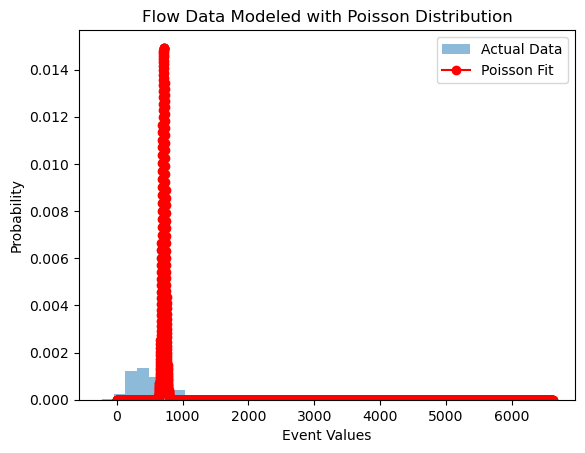

In [49]:
# Use the mean of the data as the parameter for the Poisson distribution
poisson_param = np.mean(result_array)

# Generate x values for plotting the PMF
x_values = np.arange(0, max(result_array) + 1)

# Calculate the PMF values using the Poisson distribution formula
poisson_pmf = poisson.pmf(x_values, mu=poisson_param)

# Plot the histogram of the data
plt.hist(result_array, bins=bin_size1, alpha=0.5, label='Actual Data', density=True)

# Plot the PMF (Probability Mass Function) of the Poisson distribution
plt.plot(x_values, poisson_pmf, 'ro-', label='Poisson Fit')

# Show the plot
plt.xlabel('Event Values')
plt.ylabel('Probability')
plt.title('Flow Data Modeled with Poisson Distribution')
plt.legend()
plt.show()

In [53]:
# Assuming a Poisson distribution with a certain lambda (adjust accordingly)
lambda_value = np.mean(result_array)
poisson_dist = poisson(lambda_value)

# Expected frequencies based on the Poisson distribution
expected_frequencies = poisson_dist.pmf(np.arange(0, np.max(result_array) + 1)) * len(result_array)

# Observed frequencies from your data
observed_frequencies, _ = np.histogram(result_array, bins=np.arange(0, np.max(result_array) + 2))

print(f'Sum of observed frequencies: {np.sum(observed_frequencies)}')
print(f'Sum of expected frequencies: {np.sum(expected_frequencies)}')


# Perform the chi-squared test
chi2_statistic, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Output the results
print(f'Chi-squared statistic: {chi2_statistic}')
print(f'P-value: {p_value}')

# Check the significance level (e.g., 0.05)
if p_value < 0.05:
    print('The null hypothesis is rejected. The data is significantly different from a Poisson distribution.')
else:
    print('The null hypothesis cannot be rejected. The data is not significantly different from a Poisson distribution.')
    

Sum of observed frequencies: 173
Sum of expected frequencies: 175.0000000000444


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.011560693641875114

              value  count
0      -1622.426876      0
1      -1619.376166      0
2      -1616.331208      0
3      -1613.291988      0
4      -1610.258489      0
...             ...    ...
4091  260268.646200      0
4092  260913.238400      0
4093  261559.434600      0
4094  262207.238800      0
4095  262856.655000      0

[4096 rows x 2 columns]
[-122.5843943   -26.7548089     3.82171512   11.46533868   21.65784512
   48.42558217   48.42558217   68.84097983   70.11776318   71.39465562
   85.44827565   94.39978786   98.23835268  102.0783241   122.5843943
  127.7185004   130.2867917   140.568642    141.8548887   148.2896709
  149.5773536   153.441897    157.3087333   162.468194    167.6320009
  175.386202    188.3338295   190.9271287   196.1176624   201.3135794
  209.117909    210.4198835   214.3280073   218.2394866   219.544071
  222.1543927   224.7662695   235.229756    243.0947565   250.975317
  254.9216195   256.2379645   282.6652834   287.9748548   289.3035642
  290.6328063   290.6

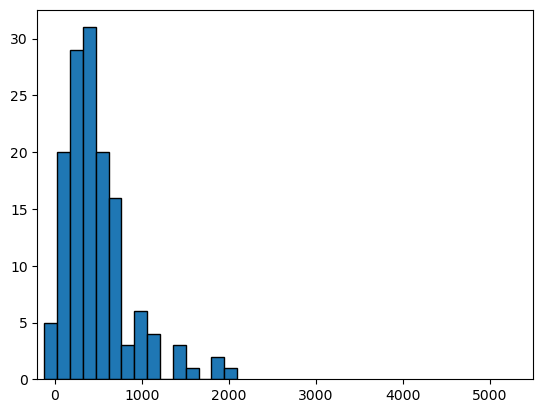

In [22]:
# Specify the path to your CSV file
df2 = pd.read_csv('844-206v5_081723 CD8+CD127 counts.csv')

df2 = pd.DataFrame(df2)
print(df2)

# Create a new DataFrame with repeated values based on counts
result_array2 = np.repeat(df2['value'], df2['count'])
result_df2 = pd.DataFrame({'value': np.repeat(df2['value'], df2['count'])})

# Convert the result to a NumPy array if needed
result_array2 = result_df2['value'].to_numpy()

print(result_array2)

#plot data
plt.hist(result_array2, bins=15, edgecolor='black')
plt.xlim(-200, 5500)
plt.show()

In [46]:
#Statistical Skewness Test

# Calculate skewness
skewness = skew(result_array2)

# Perform skewness test
stat, p_value = skewtest(result_array2)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Skewness: 1.7288467275419404, p-value: 1.7497987886578973e-10
Data is significantly skewed (reject H0)


              value  count
0      -1622.426876      0
1      -1619.376166      0
2      -1616.331208      0
3      -1613.291988      0
4      -1610.258489      0
...             ...    ...
4091  260268.646200      0
4092  260913.238400      0
4093  261559.434600      0
4094  262207.238800      0
4095  262856.655000      0

[4096 rows x 2 columns]
[ -39.50029664   20.38368954   67.56430345   67.56430345  102.0783241
  112.325577    135.4259427   144.4280848   172.80031     177.9732786
  192.2242664   206.5150443   213.0249301   224.7662695   231.3029052
  306.6263428   309.2997958   333.467887    341.568684    344.274145
  353.7642266   357.8415862   360.5632859   360.5632859   370.1114542
  379.695068    404.5096631   404.5096631   428.186516    430.9882588
  432.3904485   435.1974836   462.0464595   476.3156761   477.7480554
  486.3636474   486.3636474   487.80317     492.1279746   496.462221
  497.9090873   506.6128092   512.4370501   518.2790145   524.1389761
  534.4380464   535.913

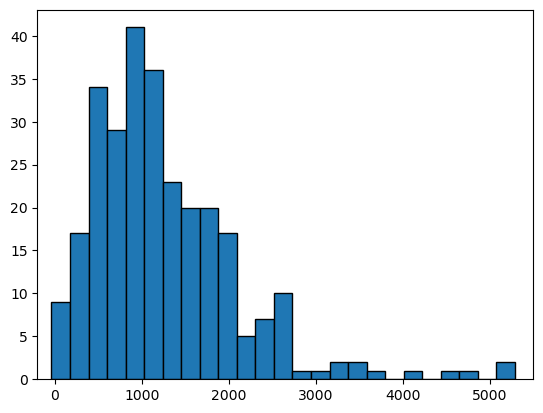

In [20]:
# Specify the path to your CSV file
df3 = pd.read_csv('844-206v5_100323 CD4+CD127 counts.csv')

df3 = pd.DataFrame(df3)
print(df3)

# Create a new DataFrame with repeated values based on counts
result_array3 = np.repeat(df3['value'], df3['count'])
result_df3 = pd.DataFrame({'value': np.repeat(df3['value'], df3['count'])})

# Convert the result to a NumPy array if needed
result_array3 = result_df3['value'].to_numpy()

print(result_array3)

#plot data
plt.hist(result_array3, bins=25, edgecolor='black')
plt.xlim(-200, 5500)
plt.show()

              value  count
0      -1622.426876      0
1      -1619.376166      0
2      -1616.331208      0
3      -1613.291988      0
4      -1610.258489      0
...             ...    ...
4091  260268.646200      0
4092  260913.238400      0
4093  261559.434600      0
4094  262207.238800      0
4095  262856.655000      0

[4096 rows x 2 columns]
[  35.67611245   38.22551138   42.05004876   54.8029653    54.8029653
   56.07868629   57.35449352   58.63038904   61.1824532    63.73489531
   68.84097983   75.22600845  103.3586374   134.1408281   136.7112791
  148.2896709   159.8879301   179.2672673   200.0140865   206.5150443
  228.6870471   229.9947737   241.7828587   247.0330544   248.3466977
  257.5547697   269.4271895   276.0399472   276.0399472   278.6885518
  278.6885518   283.9918922   285.3190217   285.3190217   285.3190217
  298.6196099   302.6204443   303.9551771   305.2904755   307.9627818
  311.9755607   320.0169734   320.0169734   321.3593004   322.7022333
  333.467887    340.

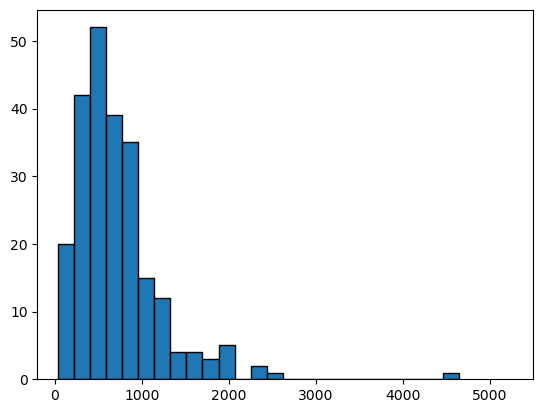

In [21]:
# Specify the path to your CSV file
df4 = pd.read_csv('844-206v5_100323 CD8+CD127 counts.csv')

df4 = pd.DataFrame(df4)
print(df4)

# Create a new DataFrame with repeated values based on counts
result_array4 = np.repeat(df4['value'], df4['count'])
result_df4 = pd.DataFrame({'value': np.repeat(df4['value'], df4['count'])})

# Convert the result to a NumPy array if needed
result_array4 = result_df4['value'].to_numpy()

print(result_array4)

#plot data
plt.hist(result_array4, bins=25, edgecolor='black')
plt.xlim(-200, 5500)
plt.show()